In [6]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline


In [7]:
df=pd.read_csv('income.csv')
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [8]:
df.shape

(22, 3)

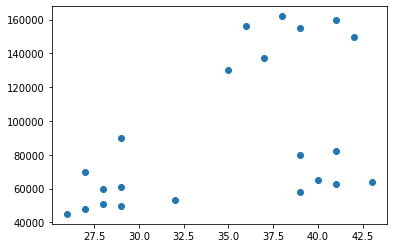

In [9]:
plt.scatter(df['Age'],df['Income'])

In [11]:
from sklearn.cluster import KMeans

In [12]:
km=KMeans(n_clusters=3)

In [13]:
x=df.drop('Name',axis='columns')

In [15]:
y_predict=km.fit(x)

In [18]:
y_predict=km.fit_predict(x)
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [19]:
#centeriods
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [20]:
df['cluster']=y_predict

In [21]:
df

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


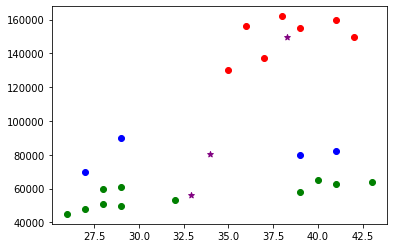

In [25]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income'],color='green')
plt.scatter(df1['Age'],df1['Income'],color='red')
plt.scatter(df2['Age'],df2['Income'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*',label='centroid')

In [26]:
#we need to bring the data to same scale 
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()
df['Income']=scaler.fit_transform(df[['Income']])
df['Age']=scaler.fit_transform(df[['Age']])

In [31]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [34]:
X=df.values[:,1:3]
X

array([[0.05882352941176472, 0.2136752136752137],
       [0.17647058823529416, 0.3846153846153845],
       [0.17647058823529416, 0.13675213675213674],
       [0.11764705882352944, 0.12820512820512822],
       [0.9411764705882355, 0.8974358974358974],
       [0.7647058823529411, 0.9401709401709402],
       [0.8823529411764706, 0.9829059829059827],
       [0.7058823529411766, 1.0],
       [0.5882352941176472, 0.9487179487179487],
       [0.5294117647058822, 0.7264957264957265],
       [0.6470588235294117, 0.7863247863247862],
       [0.0, 0.0],
       [0.05882352941176472, 0.025641025641025654],
       [0.11764705882352944, 0.05128205128205131],
       [0.17647058823529416, 0.038461538461538484],
       [0.3529411764705883, 0.0683760683760684],
       [0.8235294117647061, 0.17094017094017092],
       [0.8823529411764706, 0.15384615384615388],
       [1.0, 0.1623931623931624],
       [0.7647058823529411, 0.2991452991452991],
       [0.8823529411764706, 0.3162393162393162],
       [0.76470

In [35]:
km=KMeans(n_clusters=3)

In [36]:
y_predict= km.fit_predict(X)
y_predict

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [37]:
df['cluster']=y_predict
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [38]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

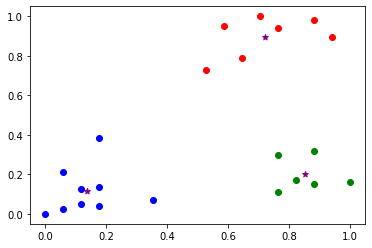

In [39]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income'],color='green')
plt.scatter(df1['Age'],df1['Income'],color='red')
plt.scatter(df2['Age'],df2['Income'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*',label='centroid')